In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load training logs
logs = pd.read_csv('./ppo/logs/progress.csv')

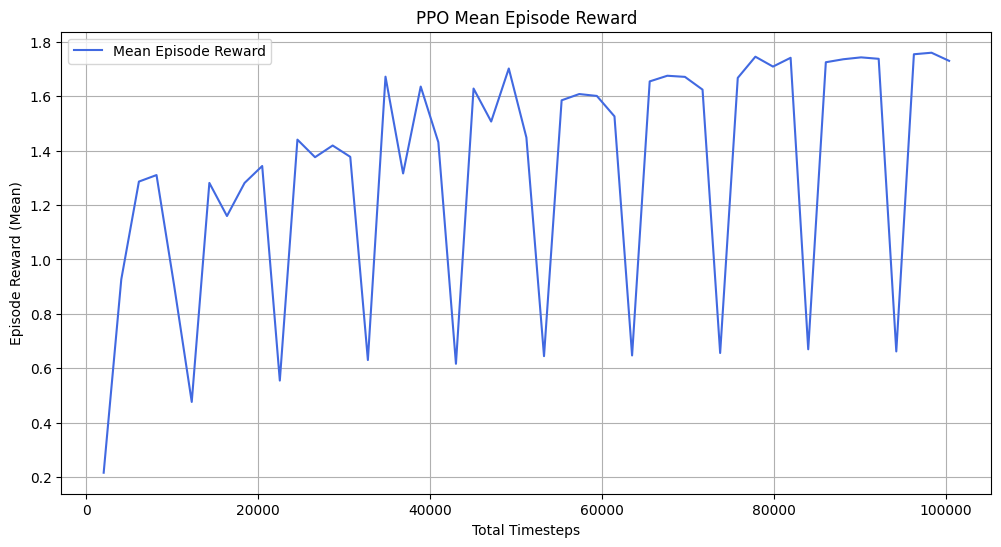

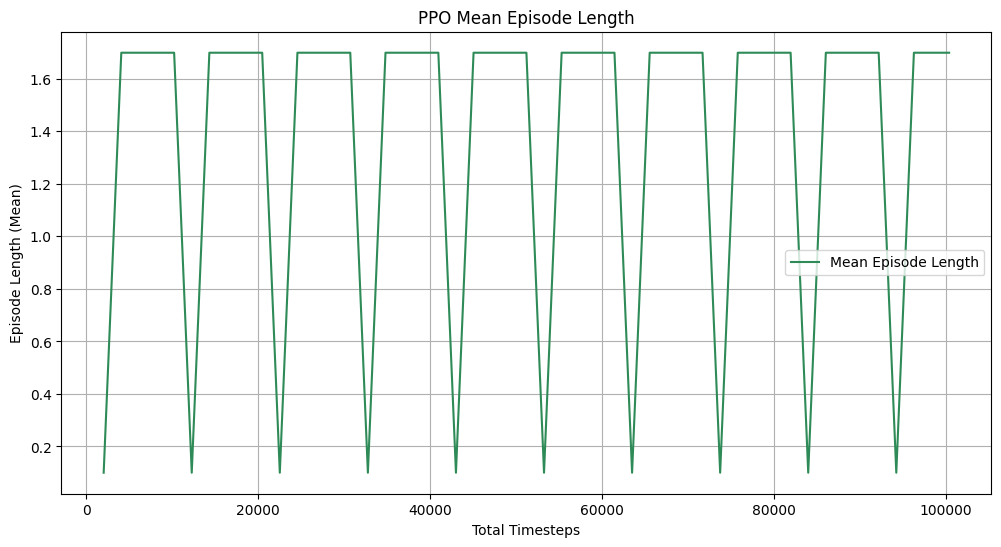

In [2]:
# Plot: Mean Episode Reward vs. Timesteps
plt.figure(figsize=(12, 6))
plt.plot(logs['time/total_timesteps'], logs['rollout/ep_rew_mean'], label='Mean Episode Reward', color='royalblue')
plt.xlabel('Total Timesteps')
plt.ylabel('Episode Reward (Mean)')
plt.title('PPO Mean Episode Reward')
plt.grid(True)
plt.legend()
plt.show()

# Plot: Episode Length vs. Timesteps
plt.figure(figsize=(12, 6))
plt.plot(logs['time/total_timesteps'], logs['rollout/ep_len_mean'], label='Mean Episode Length', color='seagreen')
plt.xlabel('Total Timesteps')
plt.ylabel('Episode Length (Mean)')
plt.title('PPO Mean Episode Length')
plt.grid(True)
plt.legend()
plt.show()

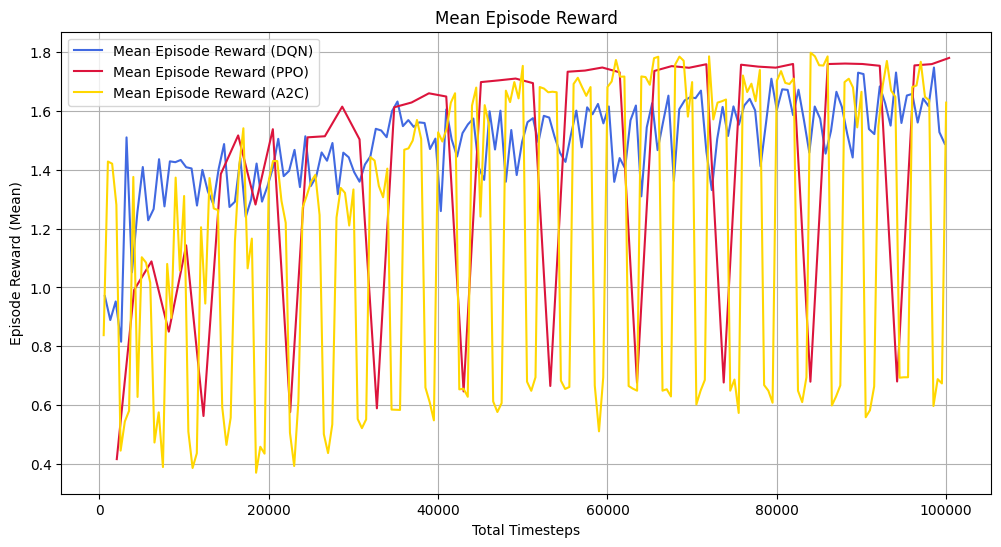

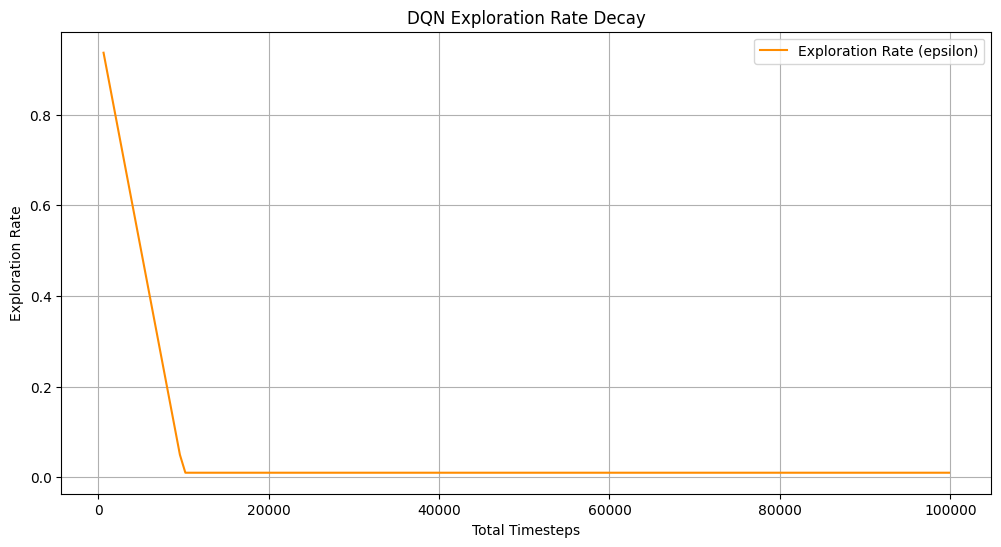

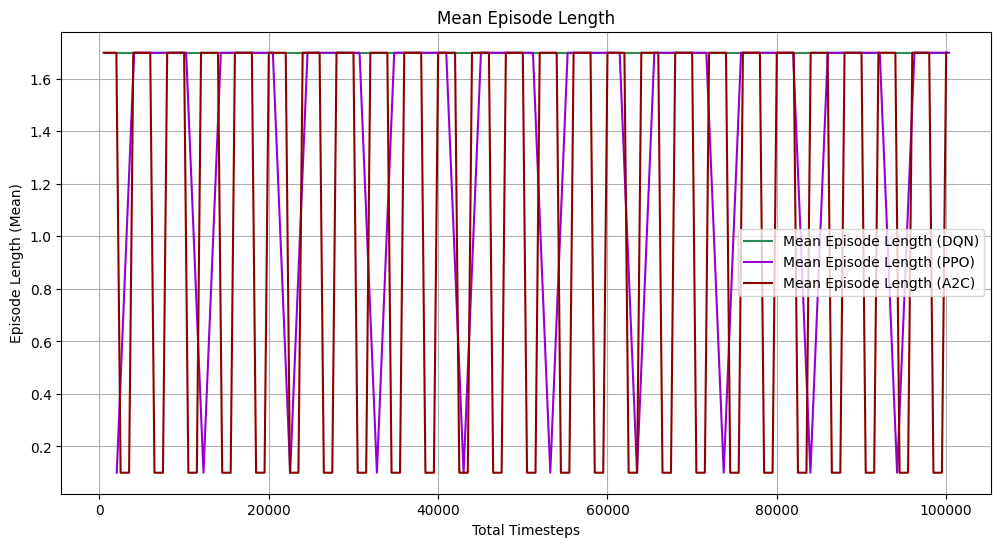

In [5]:
# Filter for first 40,000 timesteps
logs_dqn =  pd.read_csv('./dqn/logs/progress.csv')
logs_ppo = pd.read_csv('./ppo/logs/progress.csv')
logs_a2c = pd.read_csv('./a2c/logs/progress.csv')

# Plot: Mean Episode Reward vs. Timesteps
plt.figure(figsize=(12, 6))
plt.plot(logs_dqn['time/total_timesteps'], logs_dqn['rollout/ep_rew_mean'], label='Mean Episode Reward (DQN)', color='royalblue')
plt.plot(logs_ppo['time/total_timesteps'], logs_ppo['rollout/ep_rew_mean'], label='Mean Episode Reward (PPO)', color='crimson')
plt.plot(logs_a2c['time/total_timesteps'], logs_a2c['rollout/ep_rew_mean'], label='Mean Episode Reward (A2C)', color='gold')
plt.xlabel('Total Timesteps')
plt.ylabel('Episode Reward (Mean)')
plt.title('Mean Episode Reward')
plt.grid(True)
plt.legend()
plt.show()

# Plot: Exploration Rate vs. Timesteps
plt.figure(figsize=(12, 6))
plt.plot(logs_dqn['time/total_timesteps'], logs_dqn['rollout/exploration_rate'], label='Exploration Rate (epsilon)', color='darkorange')
plt.xlabel('Total Timesteps')
plt.ylabel('Exploration Rate')
plt.title('DQN Exploration Rate Decay')
plt.grid(True)
plt.legend()
plt.show()

# Plot: Episode Length vs. Timesteps
plt.figure(figsize=(12, 6))
plt.plot(logs_dqn['time/total_timesteps'], logs_dqn['rollout/ep_len_mean'], label='Mean Episode Length (DQN)', color='seagreen')
plt.plot(logs_ppo['time/total_timesteps'], logs_ppo['rollout/ep_len_mean'], label='Mean Episode Length (PPO)', color='darkviolet')
plt.plot(logs_a2c['time/total_timesteps'], logs_a2c['rollout/ep_len_mean'], label='Mean Episode Length (A2C)', color='darkred')
plt.xlabel('Total Timesteps')
plt.ylabel('Episode Length (Mean)')
plt.title('Mean Episode Length')
plt.grid(True)
plt.legend()
plt.show()


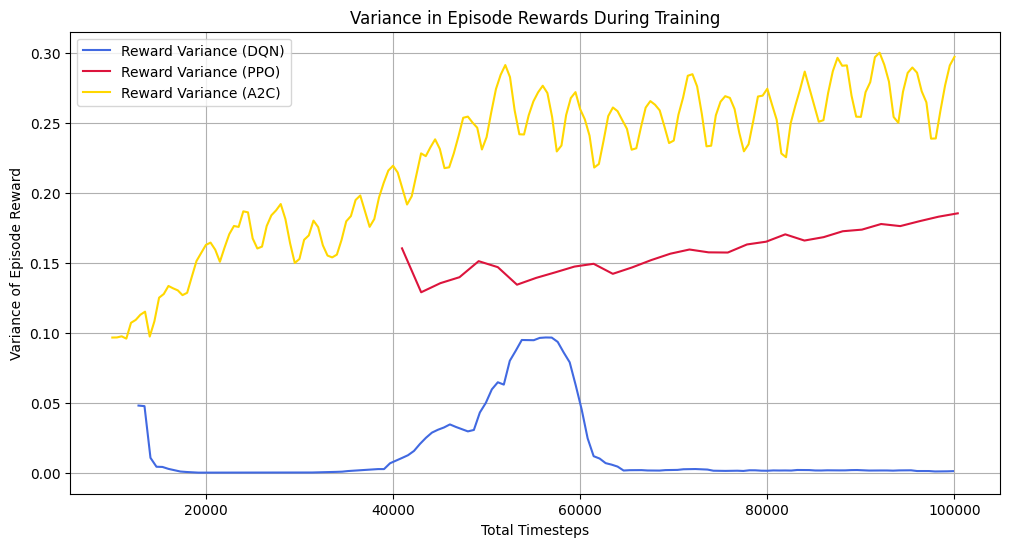

In [18]:
# Convert logs to DataFrames if they aren't already
logs_dqn_df = pd.DataFrame(logs_dqn)
logs_ppo_df = pd.DataFrame(logs_ppo)
logs_a2c_df = pd.DataFrame(logs_a2c)

# Calculate rolling variance (optional: adjust window size)
window_size = 20
var_dqn = logs_dqn_df['rollout/ep_rew_mean'].rolling(window=window_size).var()
var_ppo = logs_ppo_df['rollout/ep_rew_mean'].rolling(window=window_size).var()
var_a2c = logs_a2c_df['rollout/ep_rew_mean'].rolling(window=window_size).var()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(logs_dqn_df['time/total_timesteps'], var_dqn, label='Reward Variance (DQN)', color='royalblue')
plt.plot(logs_ppo_df['time/total_timesteps'], var_ppo, label='Reward Variance (PPO)', color='crimson')
plt.plot(logs_a2c_df['time/total_timesteps'], var_a2c, label='Reward Variance (A2C)', color='gold')
plt.xlabel('Total Timesteps')
plt.ylabel('Variance of Episode Reward')
plt.title('Variance in Episode Rewards During Training')
plt.grid(True)
plt.legend()
plt.show()


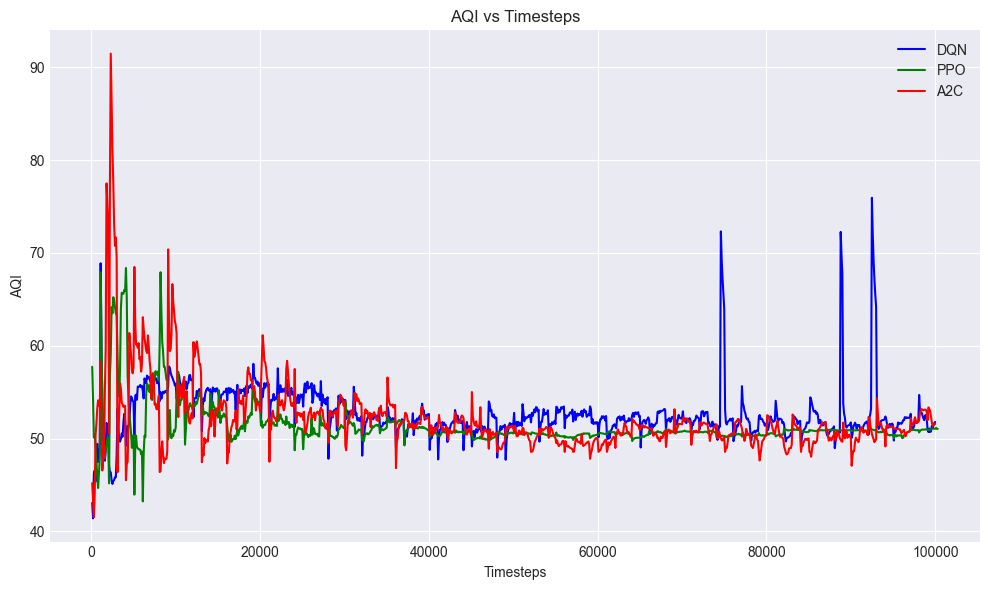

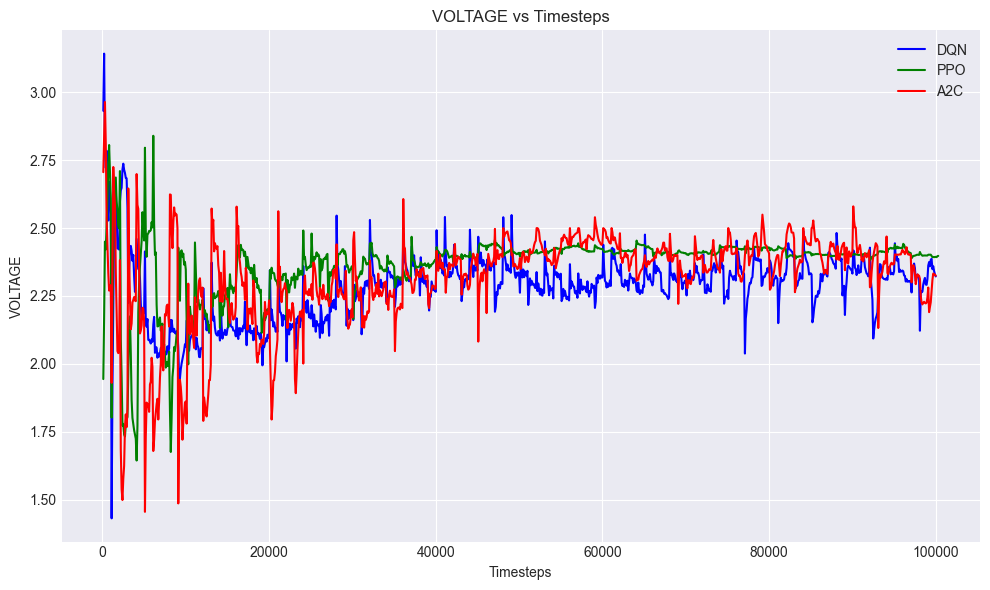

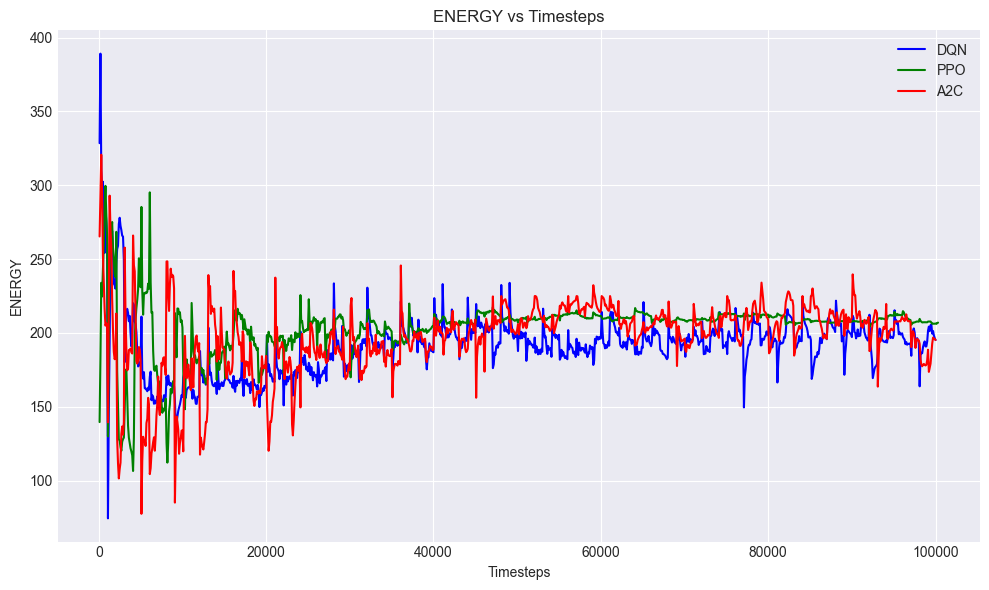

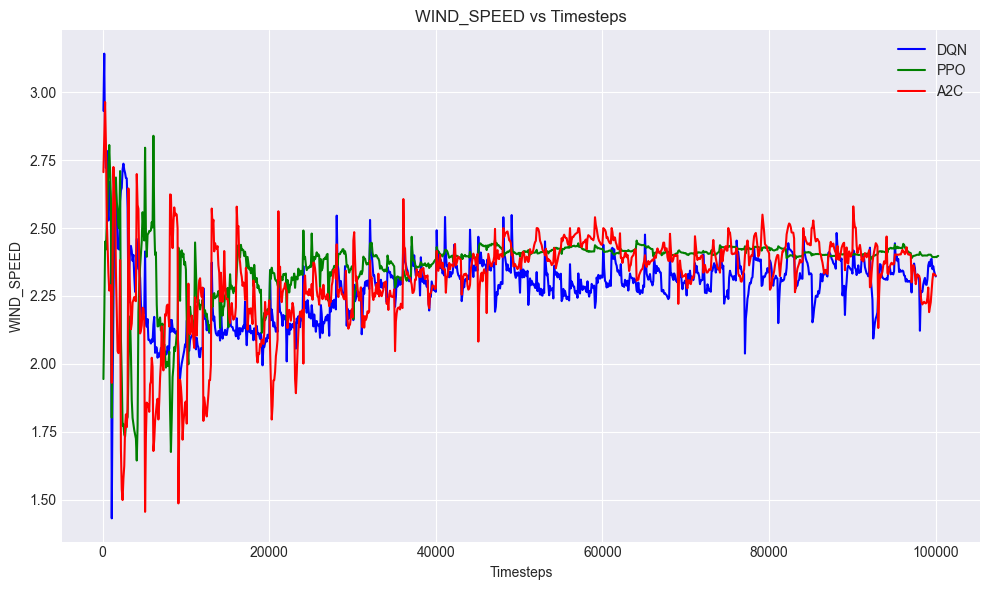

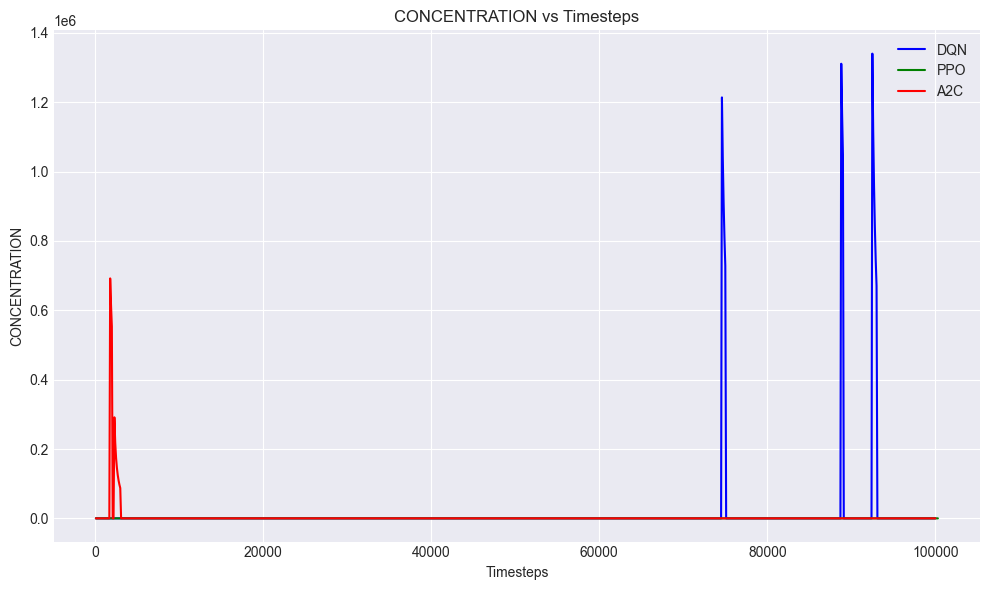

In [10]:
# Load the data
metrics_dqn = pd.read_csv('./dqn/train/training_metrics.csv')
metrics_ppo = pd.read_csv('./ppo/train/training_metrics.csv')
metrics_a2c = pd.read_csv('./a2c/train/training_metrics.csv')

# Define the metrics to plot
metrics = ['aqi', 'voltage', 'energy', 'wind_speed', 'concentration']

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')

# Create a plot for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.plot(metrics_dqn['timestep'], metrics_dqn[metric], label='DQN', color='blue')
    plt.plot(metrics_ppo['timestep'], metrics_ppo[metric], label='PPO', color='green')
    plt.plot(metrics_a2c['timestep'], metrics_a2c[metric], label='A2C', color='red')
    
    plt.title(f'{metric.upper()} vs Timesteps')
    plt.xlabel('Timesteps')
    plt.ylabel(metric.upper())
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
